In [1]:
%pip install apyori

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [3]:
store_data = pd.read_csv('D:/SEM 8/dataset/Grocery_transaction.csv', header=None)

In [4]:
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,இறால்,பாதாம்,வாழைப்பழம்,காய்கறிகள்,பச்சை திராட்சை,முழு கோதுமை மாவு,கிழங்குகள்,உளுந்து,இட்லி அரிசி,பழச்சாறு,தேங்காய்,பசும் தேநீர்,தேன்,சாலட்,நீர்,சால்மன் மீன்,புளி,கீரை,இடலை எண்ணெய்
1,ரொட்டி,இறைச்சி,முட்டைகள்,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,சட்னி,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,கோழிக் கறி,வாழைப்பழம்,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,நீர்,பால்,குளுக்கோஸ்,முழு கோதுமை அரிசி,பசும் தேநீர்,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
records = []
for i in range(0, 7537):
  records.append([str(store_data.values[i,j]) for j in range(0, 19)])

In [13]:
for i,j in enumerate(records):
    while 'nan' in records[i]:
        records[i].remove('nan')

In [14]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [15]:
print(len(association_results))

24


In [16]:
print(association_results[0])

RelationRecord(items=frozenset({'முழு கோதுமை பாஸ்தா', 'இடலை எண்ணெய்'}), support=0.00796072707973995, ordered_statistics=[OrderedStatistic(items_base=frozenset({'முழு கோதுமை பாஸ்தா'}), items_add=frozenset({'இடலை எண்ணெய்'}), confidence=0.27149321266968324, lift=4.142195028120248)])


In [17]:
for item in association_results:
  pair = item[0]
  items = [x for x in pair]
  print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
  print("Support: " + str(item[1]))
  print("Confidence: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("=====================================")

Rule: ['முழு கோதுமை பாஸ்தா'] -> ['இடலை எண்ணெய்']
Support: 0.00796072707973995
Confidence: 0.27149321266968324
Lift: 4.142195028120248
Rule: ['பாஸ்தா'] -> ['இறால்']
Support: 0.005041793817168635
Confidence: 0.3220338983050847
Lift: 4.528301290159372
Rule: ['பாஸ்தா'] -> ['இறைச்சி']
Support: 0.006103224094467295
Confidence: 0.3898305084745763
Lift: 3.4607214868938536
Rule: ['தக்காளி சட்னி'] -> ['மாட்டிறைச்சி']
Support: 0.0053071513864933
Confidence: 0.3773584905660377
Lift: 3.8590921891400622
Rule: ['மூலிகை & மிளகு'] -> ['மாட்டிறைச்சி']
Support: 0.0159214541594799
Confidence: 0.32345013477088946
Lift: 3.3077933049771966
Rule: ['ஸ்பாகெட்டி', 'அரிசி மாவு'] -> ['இடலை எண்ணெய்']
Support: 0.005041793817168635
Confidence: 0.20105820105820107
Lift: 3.067562067562068
Rule: ['காய்கறிகள்', 'இடலை எண்ணெய்'] -> ['பால்']
Support: 0.005041793817168635
Confidence: 0.39583333333333337
Lift: 3.034990674805019
Rule: ['காய்கறிகள்', 'ஸ்பாகெட்டி'] -> ['இடலை எண்ணெய்']
Support: 0.00636858166379196
Confidence: 0.2

In [18]:
results = []
for item in association_results:
    lhs = " - ".join(list(item[2][0].items_base))
    rhs = " - ".join(list(item[2][0].items_add))
    support = item.support
    freq = support * len(association_results)
    confidence = item[2][0].confidence
    lift = item[2][0].lift
    rows = (lhs, rhs,support,confidence,lift, freq)
    results.append(rows)
#out of the for
labels = ['LHS','RHS','Support','Confidence','Lift', 'Frequency']
rules_out = pd.DataFrame.from_records(results, columns = labels)

In [19]:
rules_out

,LHS,RHS,Support,Confidence,Lift,Frequency
0,முழு கோதுமை பாஸ்தா,இடலை எண்ணெய்,0.007961,0.271493,4.142195,0.191057
1,பாஸ்தா,இறால்,0.005042,0.322034,4.528301,0.121003
2,பாஸ்தா,இறைச்சி,0.006103,0.389831,3.460721,0.146477
3,தக்காளி சட்னி,மாட்டிறைச்சி,0.005307,0.377358,3.859092,0.127372
4,மூலிகை & மிளகு,மாட்டிறைச்சி,0.015921,0.323450,3.307793,0.382115
5,ஸ்பாகெட்டி - அரிசி மாவு,இடலை எண்ணெய்,0.005042,0.201058,3.067562,0.121003
6,காய்கறிகள் - இடலை எண்ணெய்,பால்,0.005042,0.395833,3.034991,0.121003
7,காய்கறிகள் - ஸ்பாகெட்டி,இடலை எண்ணெய்,0.006369,0.200837,3.064184,0.152846
8,கோழிக் கறி - இடலை எண்ணெய்,பால்,0.004909,0.411111,3.152131,0.117819
9,சூப் - நீர்,இடலை எண்ணெய்,0.005174,0.222857,3.400150,0.124187


In [20]:
# saving the dataframe
rules_out.to_csv(r'D:\\SEM 8\\dataset\\Apriori_out.csv', header=False, index=False, encoding='utf-8-sig')

In [1]:
import matplotlib.pyplot as plt

In [2]:
x_axis = ['இறால்', 'மீன்', 'பால்', 'வாழைப்பழம்','சாக்லேட்','முட்டைகள்']
y_axis = ['736', '322', '1061','250','1600','1349']

C:\Users\MURUGAVALLI\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MURUGAVALLI\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MURUGAVALLI\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 2993 (\N{TAMIL LETTER RRA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MURUGAVALLI\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 3006 (\N{TAMIL VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MURUGAVALLI\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 2994 (\N{TAMIL LETTER LA}) m

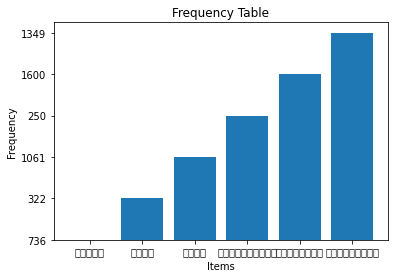

In [4]:
plt.bar(x_axis, y_axis)
plt.title('Frequency Table')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()